In [1]:
import h5py
import psana
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import  rotate
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit,minimize
import multiprocessing
import os
from functools import partial
import time
import sys
import argparse
from datetime import datetime
import tempfile
import XSpect.XSpect_Analysis
import XSpect.XSpect_Controller
import XSpect.XSpect_Visualization


<font size=5>XAS Analysis and Visualization Test</font>

In [2]:
start=time.time()
xas_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(lcls_run=21, hutch='xcs', experiment_id='xcsl1004021')

In [3]:
start=time.time()
xas_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(lcls_run=21, hutch='xcs', experiment_id='xcsl1004021')
xas=XSpect.XSpect_Controller.XASBatchAnalysis()
keys=['epics/ccm_E','tt/ttCorr','epics/lxt_ttc', 'enc/lasDelay' , 'ipm4/sum','tt/AMPL','epix_1/ROI_0_sum'] 
names=['ccm','time_tool_correction','lxt_ttc'  ,'encoder','ipm', 'time_tool_ampl','epix']
xas.set_key_aliases(keys,names)
xas.add_filter('xray','ipm',500.0)
xas.add_filter('simultaneous','ipm',500.0)
xas.add_filter('simultaneous','time_tool_ampl',0.01)
xas.run_parser(['298-301 307-319'])
xas.primary_analysis_parallel_loop(4,xas_experiment)
#xas.primary_analysis_loop(xas_experiment)
end=time.time()

/sdf/home/l/lbgee/xspect/XSpect/XSpect_Visualization.py:116: RuntimeWarning: invalid value encountered in divide
  laser_on_spectrum=xas_analysis.summed_laser_on/xas_analysis.summed_norm_on
/sdf/home/l/lbgee/xspect/XSpect/XSpect_Visualization.py:117: RuntimeWarning: invalid value encountered in divide
  laser_off_spectrum=np.divide(np.nansum(xas_analysis.summed_laser_off,axis=0),np.nansum(xas_analysis.summed_norm_off,axis=0))


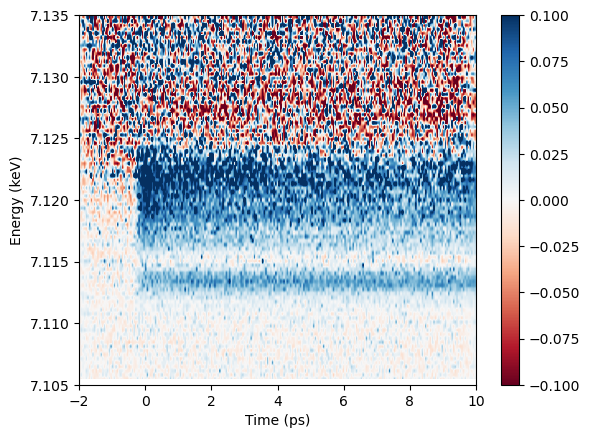

In [4]:
v=XSpect.XSpect_Visualization.XASVisualization()
v.combine_spectra(xas_analysis=xas,
                  xas_laser_key='epix_simultaneous_laser_time_energy_binned',
                  xas_key='epix_xray_not_laser_time_energy_binned',
                  norm_laser_key='ipm_simultaneous_laser_time_energy_binned',
                  norm_key='ipm_xray_not_laser_time_energy_binned')
v.vmin=-0.1
v.vmax=0.1
v.plot_2d_difference_spectrum(xas)

In [6]:
np.save('XAS_Time_Domain.npy',xas.difference_spectrum)